In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
import matplotlib as mpl

In [9]:
glm4 = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s10_h2_output.npz")["test"]
glm8 = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/glm_s14_h2_output.npz")["test"]
glm12 = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s18_h2_output.npz")["test"]
glm4_tri = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/glm_s5_h3_output.npz")["test"]
glm8_tri = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/glm_s9_h3_output.npz")["test"]
glm12_tri = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/glm_s13_h3_output.npz")["test"]

gru4 = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/gru_s10_h20_output.npz")["test"]
gru8 = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/gru_s14_h20_output.npz")["test"]
gru12 = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/gru_s18_h20_output.npz")["test"]
gru4_tri = np.load("/media/hdd01/sklee/CA1_clust4-60/hand/grumulti_s8_h20_output.npz")["test"]
gru8_tri = np.load("/media/hdd01/sklee/CA1_clust8-30/hand/grumulti_s16_h20_output.npz")["test"]
gru12_tri = np.load("/media/hdd01/sklee/CA1_clust12-20/hand/grumulti_s24_h20_output.npz")["test"]

true4 = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff_stimseed1_set1.npy")[-20*50000:].reshape((20,-1))
true8 = np.load("/media/hdd01/sklee/CA1_clust8-30/data/V_diff_stimseed1.npy")[-20*50000:].reshape((20,-1))
true12 = np.load("/media/hdd01/sklee/CA1_clust12-20/data/V_diff_stimseed1.npy")[-20*50000:].reshape((20,-1))

In [10]:
glm_var_exp = np.empty((20, 6))
gru_var_exp = np.empty((20, 6))

for i in range(20):
    glm_var_exp[i,0] = explained_variance_score(true4[i], glm4[i])
    glm_var_exp[i,2] = explained_variance_score(true8[i], glm8[i])
    glm_var_exp[i,4] = explained_variance_score(true12[i], glm12[i])
    glm_var_exp[i,1] = explained_variance_score(true4[i], glm4_tri[i])
    glm_var_exp[i,3] = explained_variance_score(true8[i], glm8_tri[i])
    glm_var_exp[i,5] = explained_variance_score(true12[i], glm12_tri[i])
    
    gru_var_exp[i,0] = explained_variance_score(true4[i], gru4[i])
    gru_var_exp[i,2] = explained_variance_score(true8[i], gru8[i])
    gru_var_exp[i,4] = explained_variance_score(true12[i], gru12[i])
    gru_var_exp[i,1] = explained_variance_score(true4[i], gru4_tri[i])
    gru_var_exp[i,3] = explained_variance_score(true8[i], gru8_tri[i])
    gru_var_exp[i,5] = explained_variance_score(true12[i], gru12_tri[i])

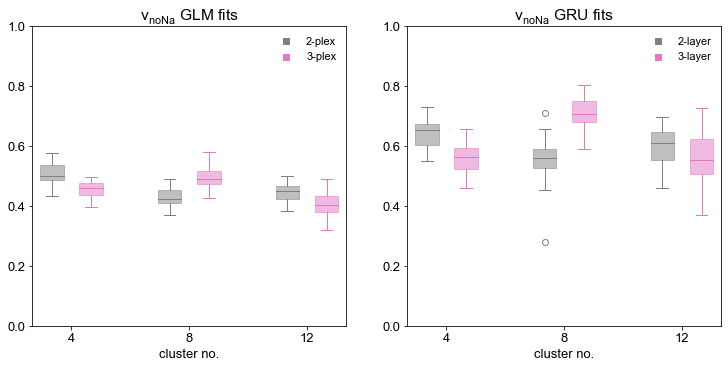

In [25]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

fig = plt.figure(constrained_layout=True, figsize = (10,5))
gs = fig.add_gridspec(1,2, wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

colors = ["gray", "tab:pink", "gray", "tab:pink", "gray", "tab:pink"]
cap_colors = ["gray", "gray", "tab:pink", "tab:pink",
             "gray", "gray", "tab:pink", "tab:pink",
             "gray", "gray", "tab:pink", "tab:pink"]
bp = ax1.boxplot(glm_var_exp, positions = [1,2,4,5,7,8], widths = 0.6, patch_artist=True)
for i in range(glm_var_exp.shape[1]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(glm_var_exp.shape[1]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ax1.set_xticks([1.5, 4.5, 7.5])
ax1.set_xticklabels(["4", "8", "12"])
ax1.set_xlabel("cluster no.")
ax1.set_ylim(0,1)
ax1.set_title("$\mathregular{v_{noNa}}$ GLM fits")
ax1.set_ylabel("variance explained")

hR = ax1.scatter(1,1,c='tab:pink', marker="s")
hG = ax1.scatter(1,1,c='gray', marker="s")
ax1.legend((hG, hR),('2-plex', '3-plex'), frameon=False, fontsize=11)
hG.set_visible(False)
hR.set_visible(False)

bp = ax2.boxplot(gru_var_exp, positions = [1,2,4,5,7,8], widths = 0.6, patch_artist=True)
for i in range(glm_var_exp.shape[1]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(glm_var_exp.shape[1]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])
    
ax2.set_xticks([1.5, 4.5, 7.5])
ax2.set_xticklabels(["4", "8", "12"])
ax2.set_xlabel("cluster no.")
ax2.set_ylim(0,1)
ax2.set_title("$\mathregular{v_{noNa}}$ GRU fits")

hR = ax2.scatter(1,1,c='tab:pink', marker="s")
hG = ax2.scatter(1,1,c='gray', marker="s")
ax2.legend((hG, hR),('2-layer', '3-layer'), frameon=False, fontsize=11)
hG.set_visible(False)
hR.set_visible(False)